In [8]:
import numpy as np
from functools import partial

from simulation import Simulation
from objective_functions import LogisticRegression, LinearRegression
from optimization_algorithms import USNA
from datasets import generate_logistic_regression, generate_linear_regression

from config_simulation import N, n, true_theta, bias_setting, nu_list, gamma_list, e

In [9]:
objective_function = LogisticRegression(bias=bias_setting)
optimizer_class = USNA
optimizer_list = [optimizer_class(nu=nu) for nu in nu_list]

simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=bias_setting),
)

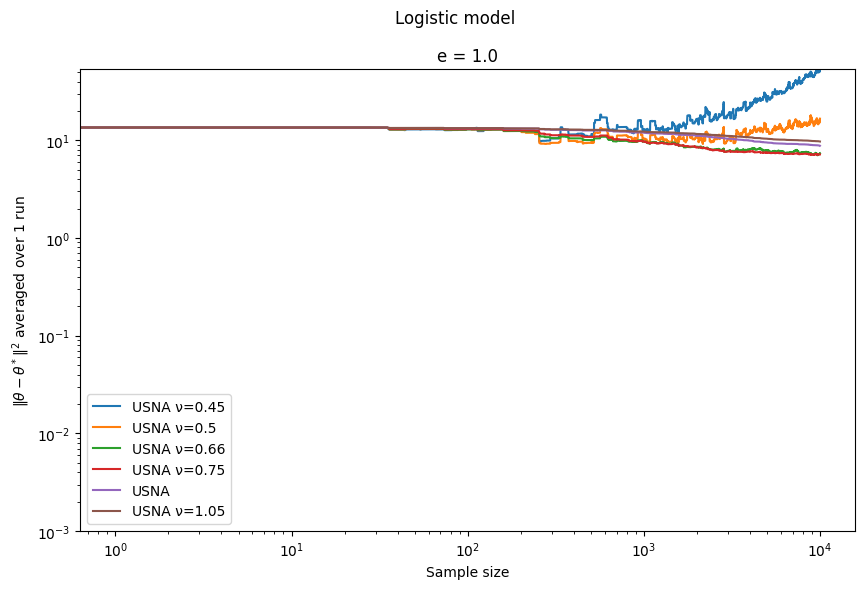

In [10]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
_, _ = simulation.run(plot=True)

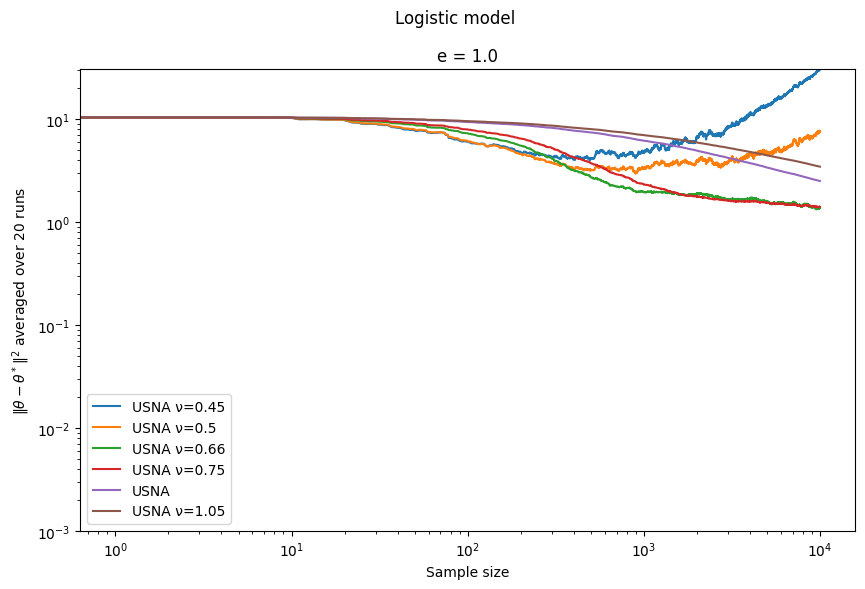

In [11]:
simulation.run_multiple_datasets(N=N, n=n)

In [12]:
objective_function = LinearRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=bias_setting),
)

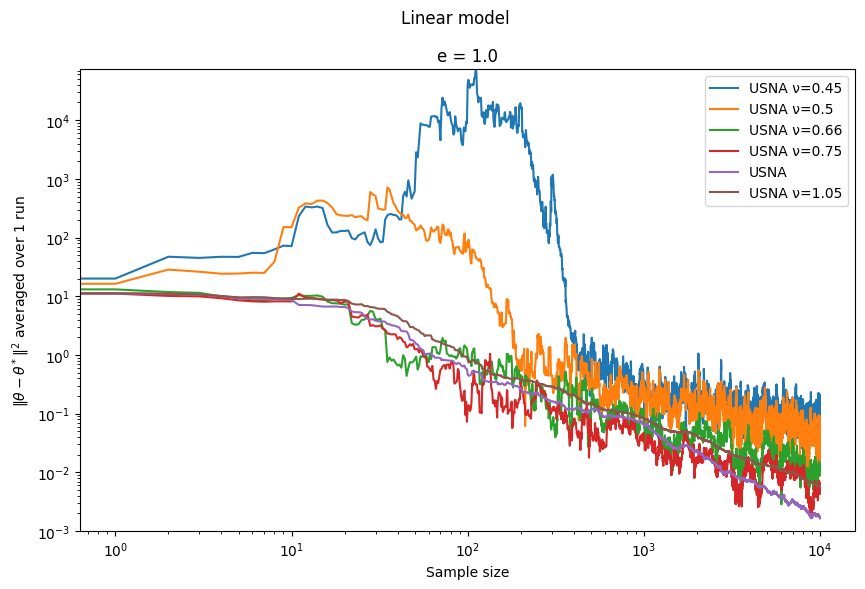

In [13]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
_, _ = simulation.run(plot=True)

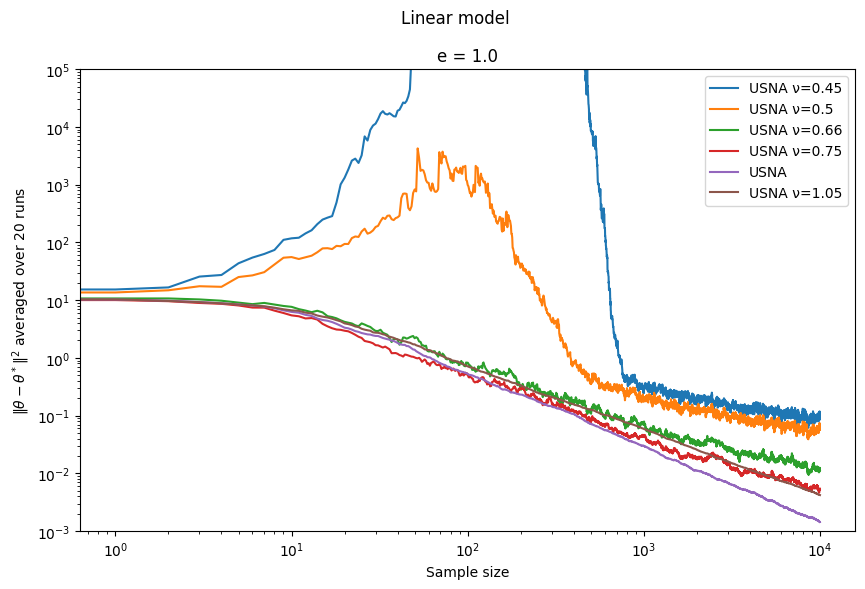

In [14]:
simulation.run_multiple_datasets(N=N, n=n)